<a href="https://colab.research.google.com/github/NotHumans211/Google-Colab/blob/main/Analisa_company_financial_in_IDX_(Bursa_Efek_Indonesia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

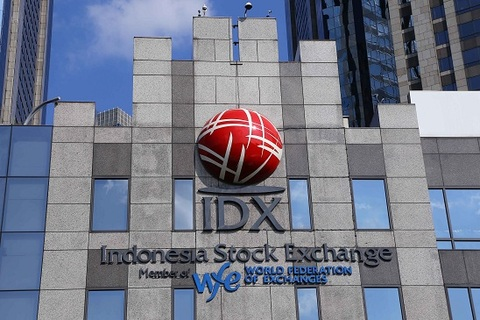

# **This dataset contains 604 public company financial statement annually in IDX (Bursa Efek Indonesia)**

#Data Cleaning and Preprocessing




In [65]:
import pandas as pd # Import pandas to work with DataFrames

# Assuming 'data.csv' is your data file
df = pd.read_csv('data/data.csv') # Load your data into a DataFrame named 'df'

# Select only numeric columns for filling missing values
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Standardizing the data (Z-score normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 3:]), columns=df.columns[3:])
df_scaled = pd.concat([df[['symbol', 'account', 'type']], df_scaled], axis=1)

#Visualization

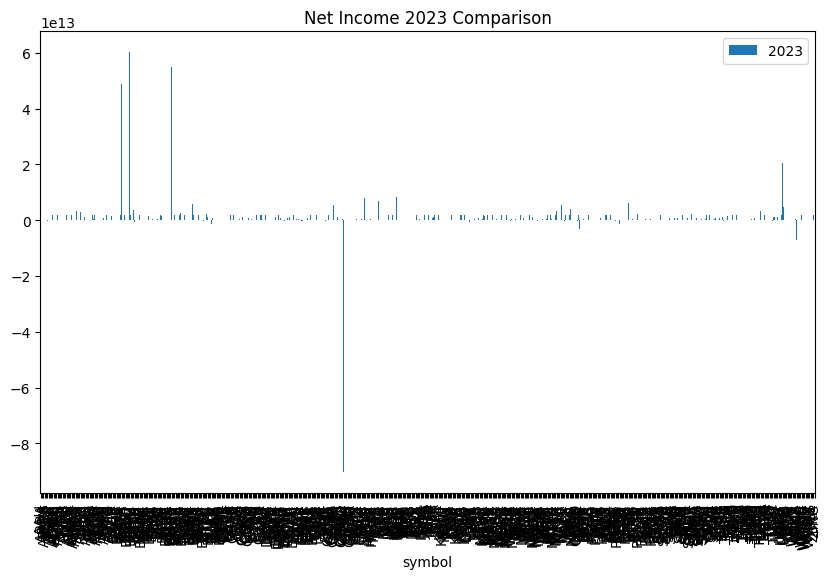

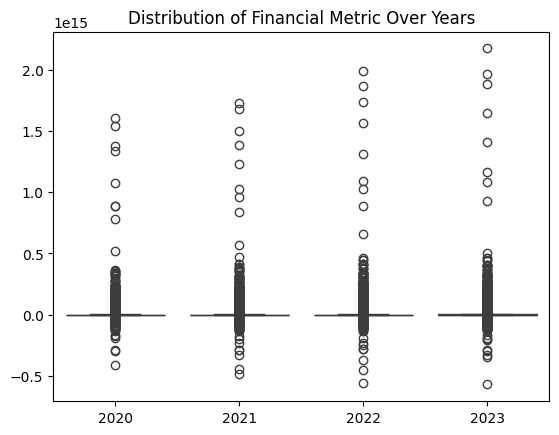

In [66]:
# Bar chart comparing 2023 data across companies for a specific account
df_2023 = df[df['account'] == 'Net Income']
df_2023.plot(kind='bar', x='symbol', y='2023', figsize=(10, 6))
plt.title('Net Income 2023 Comparison')
plt.show()

# Box plot for distribution of a financial metric across years
sns.boxplot(data=df[['2020', '2021', '2022', '2023']])
plt.title('Distribution of Financial Metric Over Years')
plt.show()


#Clustering and Segmentation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



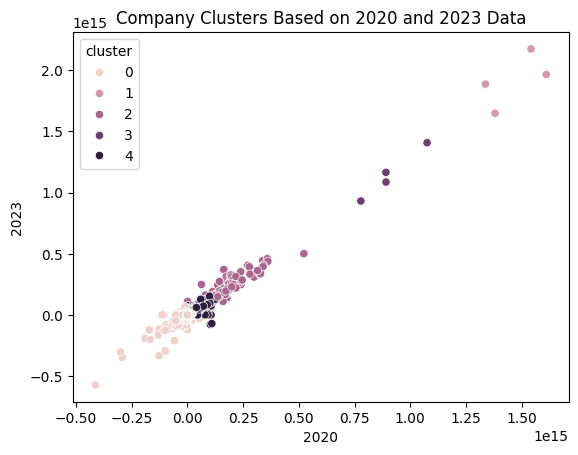

In [67]:
from sklearn.cluster import KMeans

# Clustering companies based on their financial metrics
kmeans = KMeans(n_clusters=5, random_state=0).fit(df.iloc[:, 3:])
df['cluster'] = kmeans.labels_

# Visualizing the clusters
sns.scatterplot(x='2020', y='2023', hue='cluster', data=df)
plt.title('Company Clusters Based on 2020 and 2023 Data')
plt.show()


#Predictive Modeling


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Predicting 2023 financials based on previous years
X = df[['2020', '2021', '2022']]
y = df['2023']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Output predicted values and actual values
print("Predicted values for 2023:\n", y_pred[:10])  # Display first 10 predictions
print("Actual values for 2023:\n", y_test.values[:10])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")


Predicted values for 2023:
 [4.43927716e+11 1.89627756e+11 1.81422291e+11 3.35797553e+11
 1.54496523e+12 1.74832819e+11 1.81333265e+11 4.84344628e+11
 1.81236596e+11 2.04477024e+11]
Actual values for 2023:
 [ 2.69536000e+11  1.38212060e+10  0.00000000e+00  0.00000000e+00
  2.20695000e+12  1.30192250e+08 -4.97920000e+06  9.60364560e+10
  7.85099890e+10  8.70683147e+09]

Mean Squared Error: 9.519018745111129e+24
R-squared: 0.9660838096860722


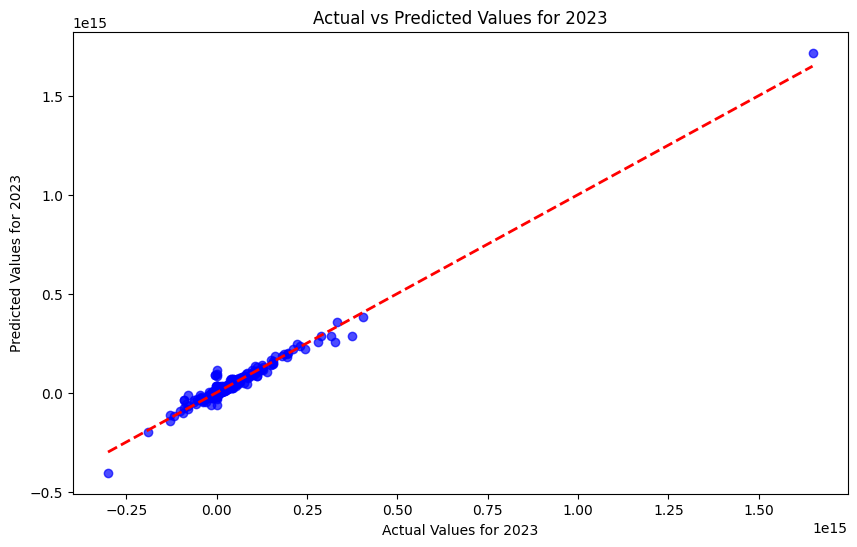

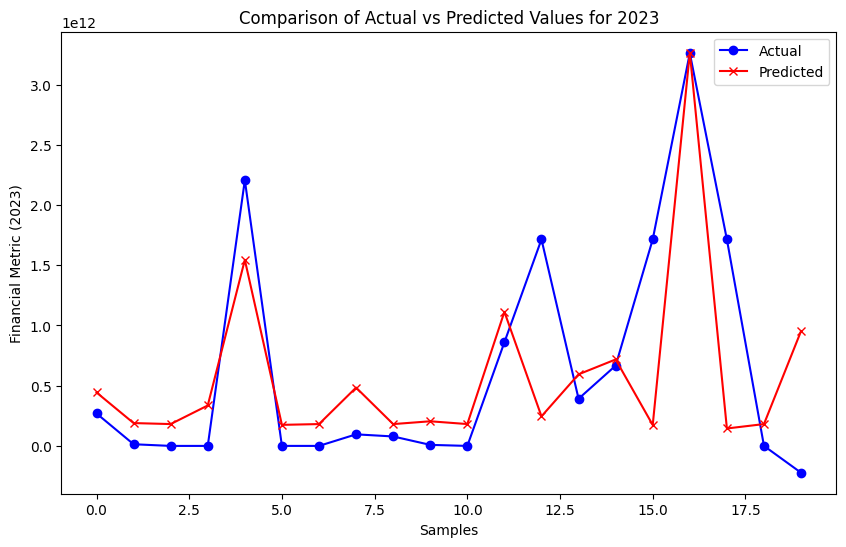

In [69]:
import matplotlib.pyplot as plt

# Predicting 2023 financials based on previous years
X = df[['2020', '2021', '2022']]
y = df['2023']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Visualizing the actual vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line

plt.xlabel('Actual Values for 2023')
plt.ylabel('Predicted Values for 2023')
plt.title('Actual vs Predicted Values for 2023')
plt.show()

# Line plot to compare first 20 actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:20], 'b-', marker='o', label='Actual')
plt.plot(y_pred[:20], 'r-', marker='x', label='Predicted')

plt.xlabel('Samples')
plt.ylabel('Financial Metric (2023)')
plt.title('Comparison of Actual vs Predicted Values for 2023')
plt.legend()
plt.show()


#Scenario Analysis


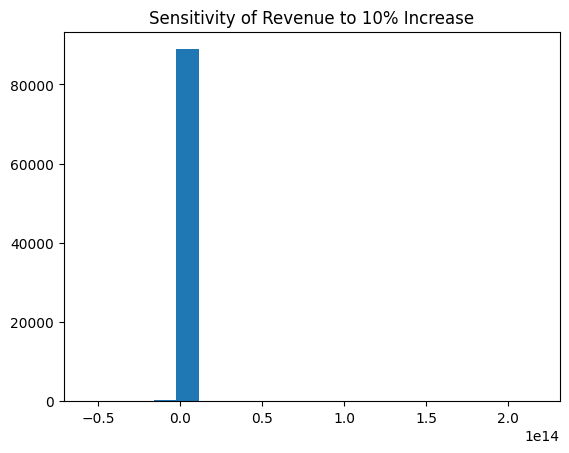

In [70]:
# What-If Analysis: Impact of a 10% increase in revenue
df['Revenue Increase 10%'] = df['2023'] * 1.10

# Sensitivity Analysis
sensitivity = df['Revenue Increase 10%'] - df['2023']
plt.hist(sensitivity, bins=20)
plt.title('Sensitivity of Revenue to 10% Increase')
plt.show()


#Reporting and Dashboards


In [71]:
import plotly.express as px

# Creating an interactive dashboard for Revenue trends
fig = px.line(df[df['account'] == 'Revenue'], x='type', y='2023', color='symbol')
fig.show()


#Stock Performance Correlation


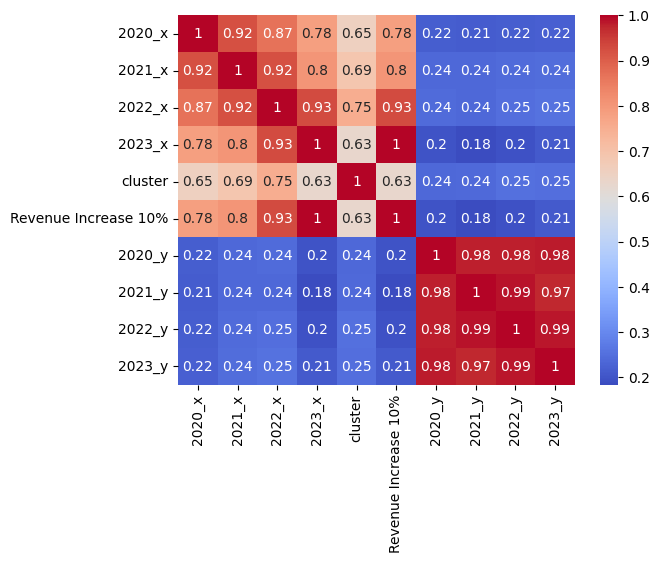

In [72]:
# Correlation between Net Income and Stock Prices (assuming you have stock price data)
stock_prices = pd.read_csv('data/data.csv')
df_with_prices = pd.merge(df[df['account'] == 'Net Income'], stock_prices, on='symbol')

# Calculate correlations on numerical columns only
correlation = df_with_prices.select_dtypes(include='number').corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

#Environmental, Social, and Governance (ESG) Analysis


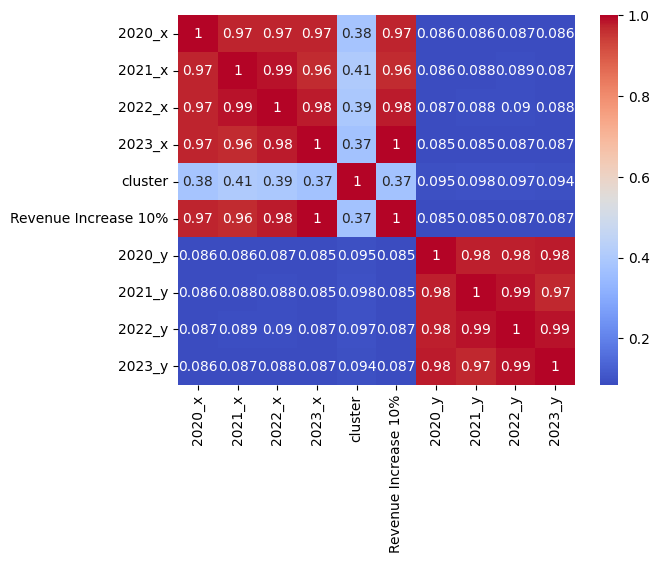

In [73]:
# Integrating ESG factors with financial data (assuming ESG data is available)
esg_data = pd.read_csv('data/data.csv')
df_esg = pd.merge(df, esg_data, on='symbol')

# Select only numerical columns for correlation calculation
numerical_df = df_esg.select_dtypes(include='number')

# Correlating ESG scores with financial performance
correlation = numerical_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

#Peer Group Analysis


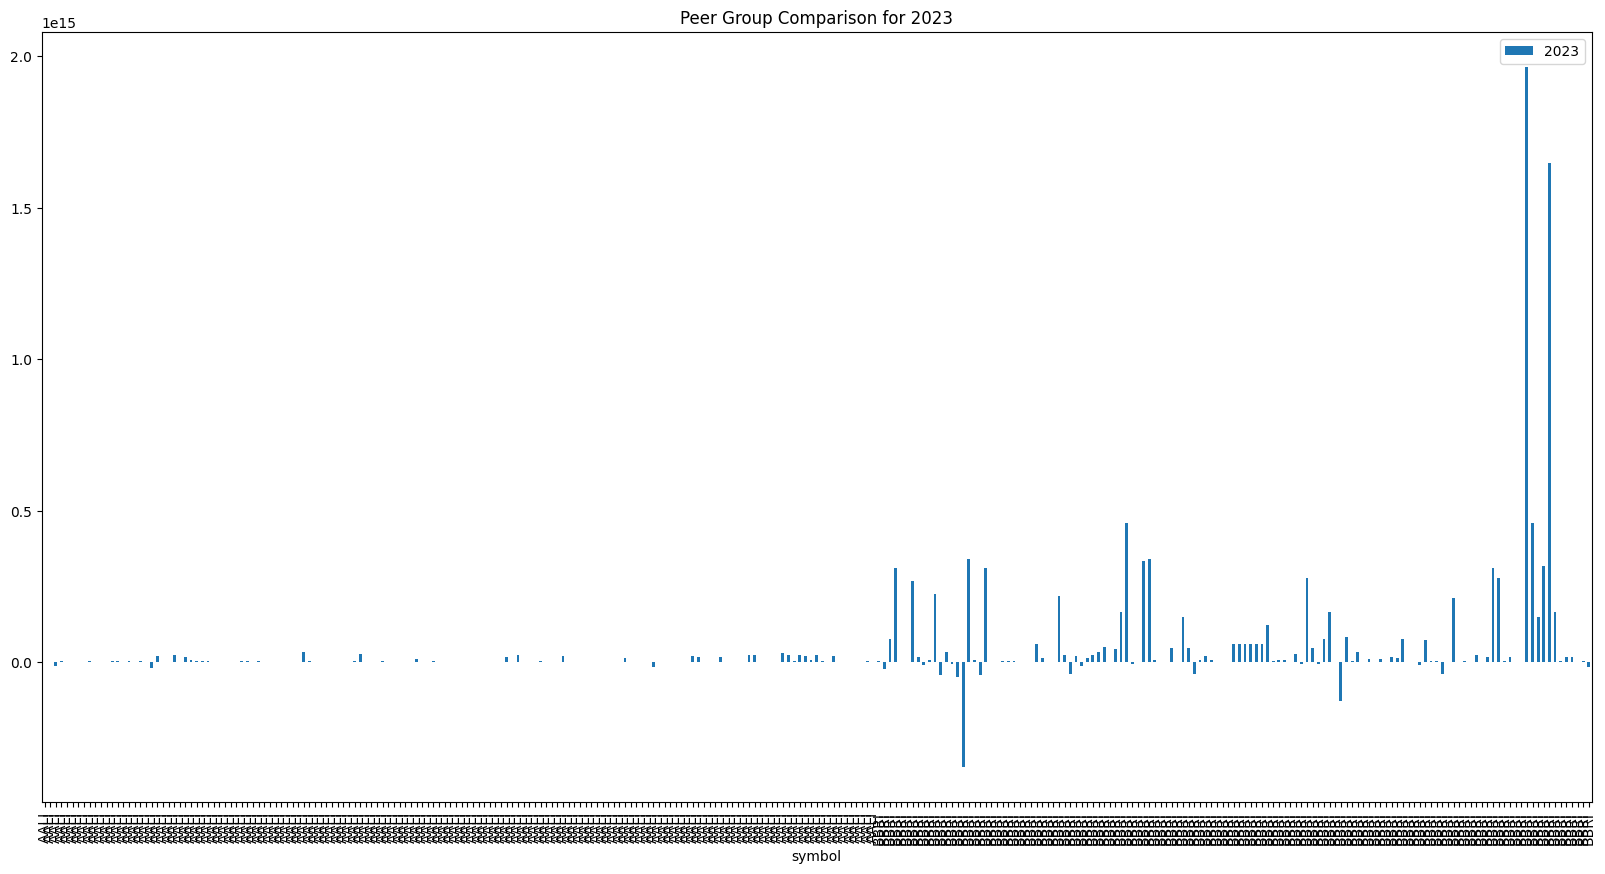

In [74]:
# Peer Group Benchmarking based on specific metrics
peers = df[(df['symbol'] == 'AALI') | (df['symbol'] == 'BBRI')]  # Replace with actual peer symbols

# Comparing a specific financial metric
peers.plot(kind='bar', x='symbol', y='2023', figsize=(20, 10))
plt.title('Peer Group Comparison for 2023')
plt.show()


#Valuation Modeling


a. Discounted Cash Flow (DCF) Analysis


In [75]:
# Define the parameters
cash_flows = [500, 550, 600, 650, 700]  # Example projected cash flows for the next 5 years
discount_rate = 0.1  # 10% discount rate
terminal_growth_rate = 0.02  # 2% terminal growth rate
terminal_value = cash_flows[-1] * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)

# Discounting cash flows to present value
DCF_value = sum([cf / (1 + discount_rate)**i for i, cf in enumerate(cash_flows, 1)]) + terminal_value / (1 + discount_rate)**len(cash_flows)

print(f"The estimated intrinsic value using DCF analysis is: {DCF_value}")


The estimated intrinsic value using DCF analysis is: 7780.206270063518
